### Student Information
Name:周宏穎

Student ID:112138508

GitHub ID: #139431794

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### Begin Assignment Here

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
for t in range(3):
    print("\n".join(twenty_train.data[t].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#Answer here
X['text'][-10:]

2247    From: daniels@math.ufl.edu (TV's Big Dealer) S...
2248    From: "danny hawrysio" <danny.hawrysio@canrem....
2249    From: shellgate!llo@uu4.psi.com (Larry L. Over...
2250    From: ingles@engin.umich.edu (Ray Ingles) Subj...
2251    From: Mark-Tarbell@suite.com Subject: Amniocen...
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, dtype: object

In [5]:
X.where(X['category']>1)

text  category  \
0                                                   NaN       NaN   
1                                                   NaN       NaN   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...       3.0   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...       3.0   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...       3.0   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...       2.0   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...       2.0   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...       2.0   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...       2.0   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...       2.0   

               category_name  
0                        NaN  
1                        NaN  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [6]:
X[X['category']>1]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[1193 rows x 3 columns]

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [7]:
# Answer here
Xi = X['category_name'][::10]
Xi = Xi[Xi=='sci.med']
Xi[:5]

30     sci.med
80     sci.med
160    sci.med
180    sci.med
220    sci.med
Name: category_name, dtype: object

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [8]:
# Answer here
X.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2252    0
2253    0
2254    0
2255    0
2256    0
Length: 2257, dtype: int64

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
0是numpy中的not a number，用來表示空值;1則是本身就是空值;而2、3皆為字串，因此結果為false；4為python中的None type，表示空值，5則是空白字串，因此結果為false

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

# Answer here
取樣後的index被隨機排序了，並且4種category_name的數量幾乎被均等分配

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

                        original_count  sample_count
category_name                                       
soc.religion.christian             599           270
sci.med                            594           277
comp.graphics                      584           247
alt.atheism                        480           206


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

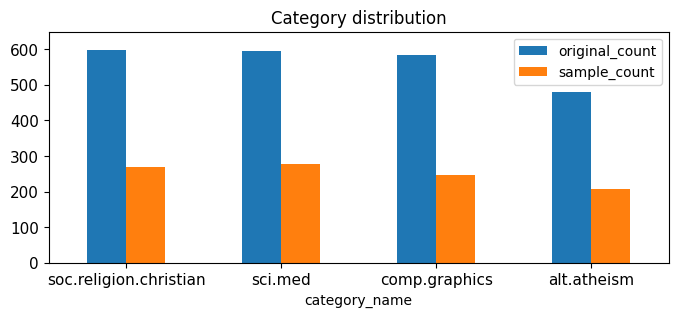

In [12]:
X_sample = X.sample(n=1000,random_state=42) 
df = pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],axis=1)
df.columns=['original_count','sample_count']

print(df)

df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, max(X.category_name.value_counts() + 50)],        
        rot = 0, fontsize = 11, figsize = (8,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(count_vect.get_feature_names_out()[:10])
# Answer here
for i in range(10,100):
    if X_counts[4,i] != 0:
        print(count_vect.get_feature_names_out()[i])

print(count_vect.get_feature_names_out()[37])

['00' '000' '0000' '0000001200' '000005102000' '0001' '000100255pixel'
 '00014' '000406' '0007']
01
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [14]:
import seaborn as sns
# Answer here
X_sample = X.sample(n=1000,random_state=42)#先對資料進行抽樣
X_counts_sample = count_vect.fit_transform(X_sample.text)
X_counts_sample.shape

(1000, 22538)

In [15]:
print(X_counts_sample[0])
print(count_vect.get_feature_names_out())

  (0, 9204)	1
  (0, 16936)	2
  (0, 7966)	2
  (0, 12327)	2
  (0, 7668)	2
  (0, 3785)	1
  (0, 19616)	1
  (0, 16960)	1
  (0, 2213)	1
  (0, 8767)	1
  (0, 19983)	1
  (0, 2717)	2
  (0, 4771)	1
  (0, 14912)	1
  (0, 12789)	1
  (0, 20143)	1
  (0, 21241)	1
  (0, 12613)	1
  (0, 14383)	1
  (0, 16040)	1
  (0, 10456)	1
  (0, 7678)	1
  (0, 14284)	1
  (0, 20509)	1
  (0, 21613)	1
  :	:
  (0, 17331)	1
  (0, 20322)	2
  (0, 15466)	1
  (0, 14707)	2
  (0, 6920)	1
  (0, 14465)	1
  (0, 3110)	1
  (0, 6399)	1
  (0, 12188)	1
  (0, 3569)	2
  (0, 12846)	1
  (0, 20360)	1
  (0, 10077)	1
  (0, 9979)	1
  (0, 12796)	1
  (0, 20643)	1
  (0, 22278)	2
  (0, 19008)	1
  (0, 12685)	1
  (0, 10878)	1
  (0, 10383)	1
  (0, 8868)	1
  (0, 14551)	1
  (0, 13808)	1
  (0, 18414)	1
['00' '000' '0000001200' ... 'zyklon' 'zyxel' 'zz']


In [16]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:100]]
plot_z = X_counts_sample[0:100, 0:100].toarray()
#對抽樣後的前100筆資料及前100筆詞彙製作HEATMAP

plot_xb = ["term_"+str(i) for i in count_vect.get_feature_names_out()[400:500]]
plot_yb = ["doc_"+ str(i) for i in list(X_sample.index)[400:500]]
plot_zb = X_counts_sample[400:500, 400:500].toarray()
#對抽樣後的第400到500筆資料及詞彙製作HEATMAP

term_00  term_000  term_0000001200  term_000406  term_0010  \
doc_561         0         0                0            0          0   
doc_440         0         0                0            0          0   
doc_1513        0         1                0            0          0   
doc_1360        0         0                0            0          0   
doc_259         0         0                0            0          0   
...           ...       ...              ...          ...        ...   
doc_1340        0         0                0            0          0   
doc_965         0         1                0            0          0   
doc_70          0         0                0            0          0   
doc_845         0         0                0            0          0   
doc_906         0         0                0            0          0   

          term_001004  term_0010580b  term_001125  term_002  \
doc_561             0              0            0         0   
doc_440             0              0            0         0   
doc_1513            0              0            0         0   
doc_1360            0              0            0         0   
doc_259             0              0            0         0   
...               ...            ...          ...       ...   
doc_1340            0              0            0         0   
doc_965             0              0            0         0   
doc_70              0              0            0         0   
doc_845             0              0            0         0   
doc_906             0              0            0         0   

          term_003258u19250  ...  term_07  term_0700  term_07102  \
doc_561                   0  ...        0          0           0   
doc_440                   0  ...        0          0           0   
doc_1513                  0  ...        0          0           0   
doc_1360                  0  ...        0          0           0   
doc_259                   0  ...        0          0           0   
...                     ...  ...      ...        ...         ...   
doc_1340                  0  ...        0          0           0   
doc_965                   0  ...        0          0           0   
doc_70                    0  ...        0          0           0   
doc_845                   0  ...        0          0           0   
doc_906                   0  ...        0          0           0   

          term_071613j5j  term_071823  term_0721  term_0729  term_08  \
doc_561                0            0          0          0        0   
doc_440                0            0          0          0        0   
doc_1513               0            0          0          0        0   
doc_1360               0            0          0          0        0   
doc_259                0            0          0          0        0   
...                  ...          ...        ...        ...      ...   
doc_1340               0            0          0          0        0   
doc_965                0            0          0          0        0   
doc_70                 0            0          0          0        0   
doc_845                0            0          0          0        0   
doc_906                0            0          0          0        0   

          term_081052  term_081303  
doc_561             0            0  
doc_440             0            0  
doc_1513            0            0  
doc_1360            0            0  
doc_259             0            0  
...               ...          ...  
doc_1340            0            0  
doc_965             0            0  
doc_70              0            0  
doc_845             0            0  
doc_906             0            0  

[100 rows x 100 columns]

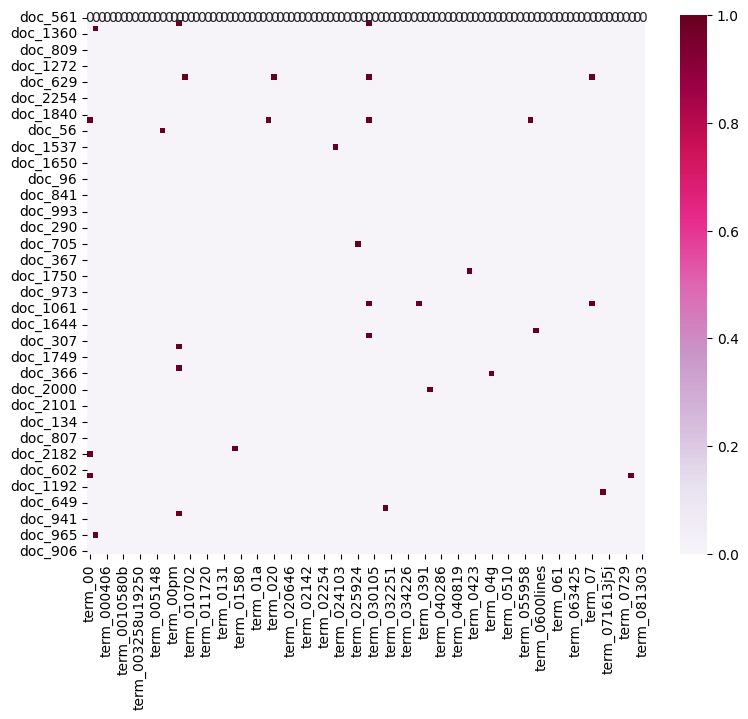

In [17]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

term_160  term_16094  term_161  term_16105  term_161109  \
doc_680          0           0         0           0            0   
doc_237          0           0         0           0            0   
doc_1911         0           0         0           0            0   
doc_2106         0           0         0           0            0   
doc_1657         0           0         0           0            0   
...            ...         ...       ...         ...          ...   
doc_2180         0           0         0           0            0   
doc_2255         0           0         0           0            0   
doc_859          0           0         0           0            0   
doc_1917         0           0         0           0            0   
doc_1550         0           0         0           0            0   

          term_161112  term_16138  term_161757  term_162  term_162020  ...  \
doc_680             0           0            0         0            0  ...   
doc_237             0           0            0         0            0  ...   
doc_1911            0           0            0         0            0  ...   
doc_2106            0           0            0         0            0  ...   
doc_1657            0           0            0         0            0  ...   
...               ...         ...          ...       ...          ...  ...   
doc_2180            0           0            0         0            0  ...   
doc_2255            0           0            0         0            0  ...   
doc_859             0           0            0         0            0  ...   
doc_1917            0           0            0         0            0  ...   
doc_1550            0           0            0         0            0  ...   

          term_182145  term_18303  term_1835  term_183519  term_184305  \
doc_680             0           0          0            0            0   
doc_237             0           0          0            0            0   
doc_1911            0           0          0            0            0   
doc_2106            0           0          0            0            0   
doc_1657            0           0          0            0            0   
...               ...         ...        ...          ...          ...   
doc_2180            0           0          0            0            0   
doc_2255            0           0          0            0            0   
doc_859             0           0          0            0            0   
doc_1917            0           0          0            0            0   
doc_1550            0           0          0            0            0   

          term_184435  term_184444  term_1848  term_1850  term_1853  
doc_680             0            0          0          0          0  
doc_237             0            0          0          0          0  
doc_1911            0            0          0          0          1  
doc_2106            0            0          0          0          0  
doc_1657            0            0          0          0          0  
...               ...          ...        ...        ...        ...  
doc_2180            0            0          0          0          0  
doc_2255            0            0          0          0          0  
doc_859             0            0          0          0          0  
doc_1917            0            0          0          0          0  
doc_1550            0            0          0          0          0  

[100 rows x 100 columns]

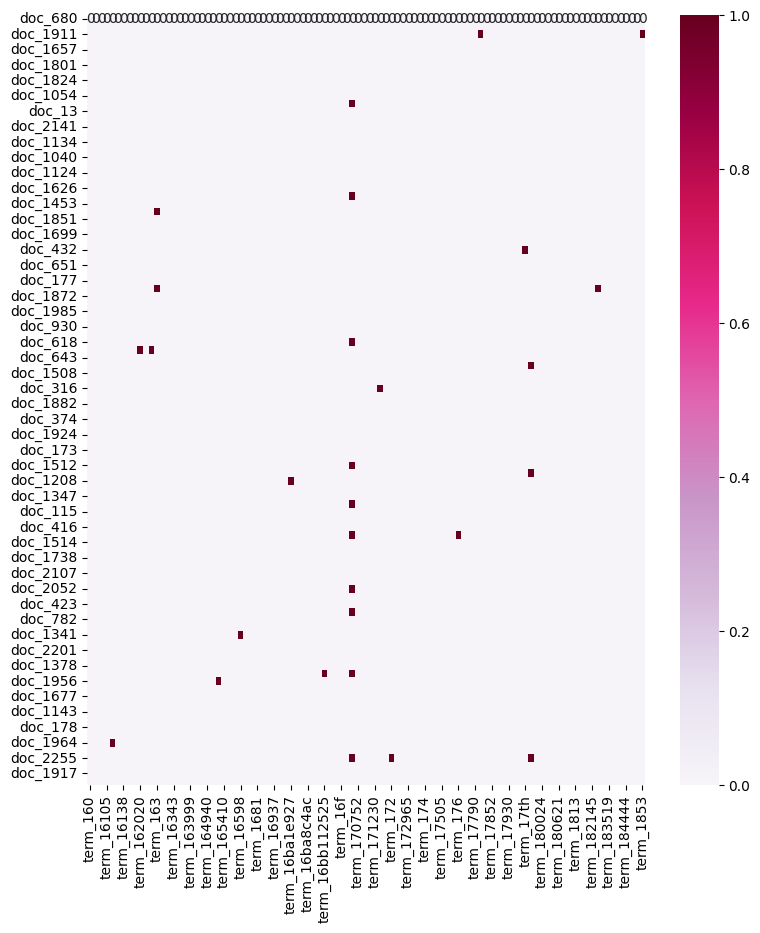

In [18]:
df_todraw = pd.DataFrame(plot_zb, columns = plot_xb, index = plot_yb)
display(df_todraw)
plt.subplots(figsize=(9, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [19]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced

array([[-17.01172954,   0.45016637,  -1.31226069],
       [ -6.80574586,  -1.15880601,  -0.40488283],
       [ 15.79461065,   3.622331  ,  12.7079908 ],
       ...,
       [ 19.97508176,  -2.85495807,   1.04076609],
       [163.88523745,  29.52467713,  -8.70178818],
       [-16.58569528,   0.61748552,  -1.88007233]])

C:\Users\user\AppData\Local\Temp\ipykernel_20980\1667864877.py:13: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(xs, ys, zs,c = c, marker='o')


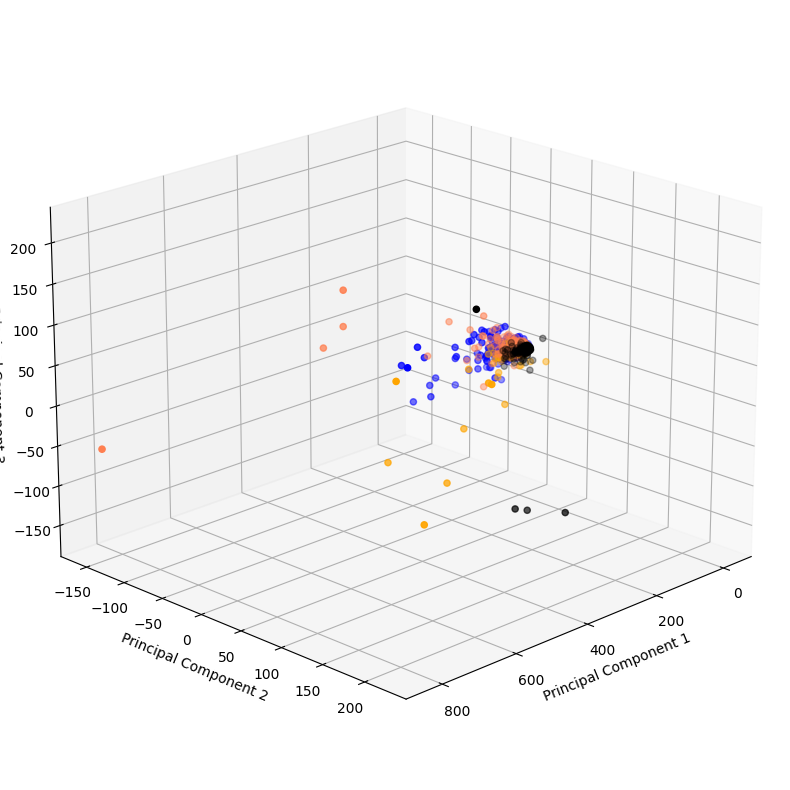

In [20]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name']== category].T[2]
    
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20980\2503833239.py:13: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(xs, ys, zs,c = c, marker='o')


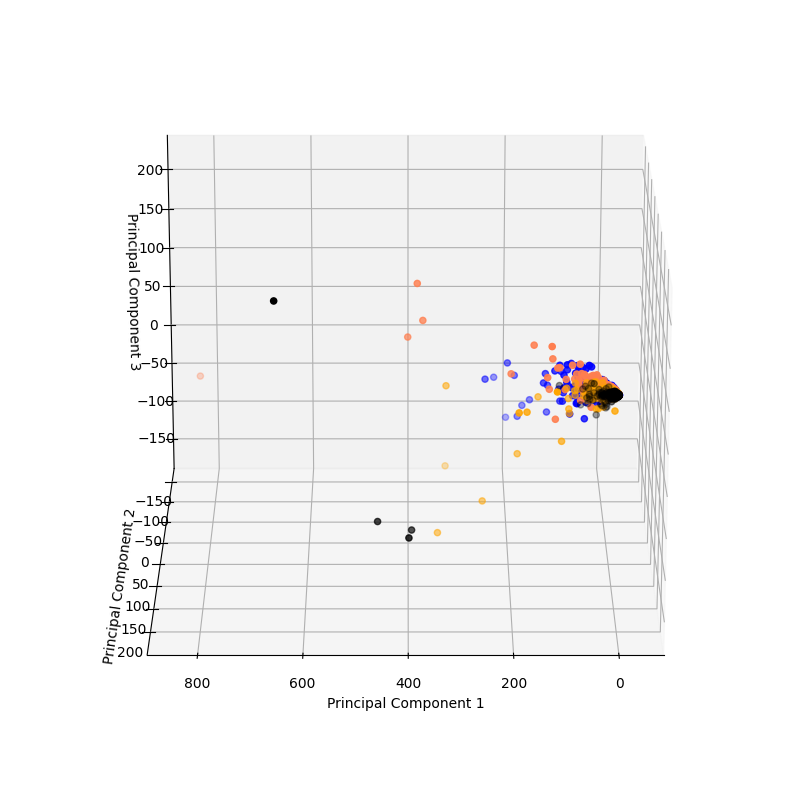

In [21]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name']== category].T[2]
    
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=90)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20980\3714856653.py:13: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(xs, ys, zs,c = c, marker='o')


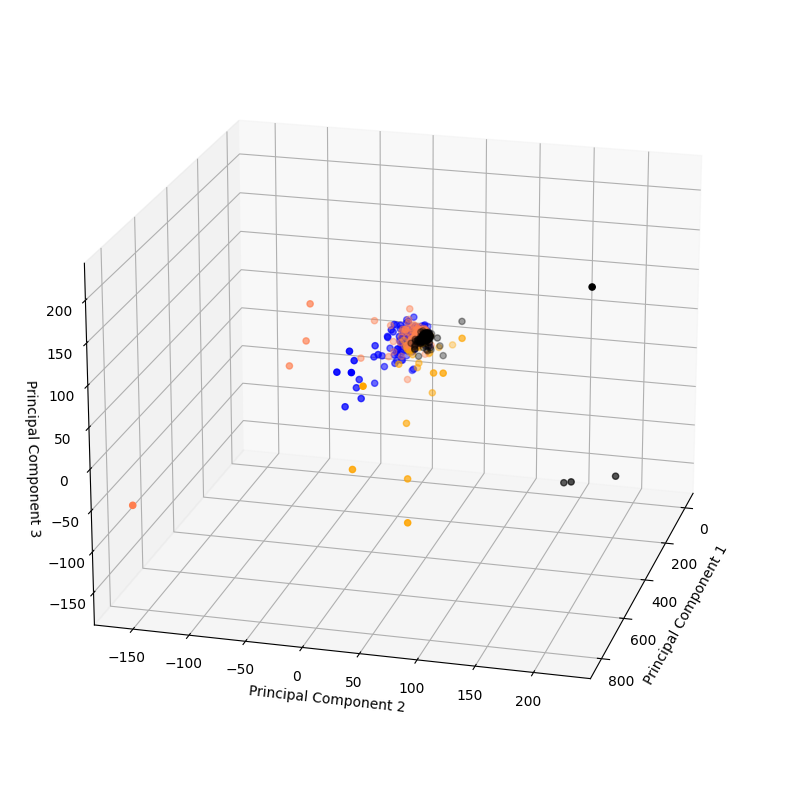

In [22]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name']== category].T[2]
    
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=15)
plt.show()


Component1 成分極少

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [23]:
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)
print(X_counts)

[134  92   1 ...   1   1   1]
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (2256, 13740)	1
  (2256, 14662)	1
  (2256, 20201)	1
  (2256, 12443)	6
  (2256, 30325)	3
  (2256, 4610)	1
  (2256, 33844)	1
  (2256, 17354)	1
  (2256, 26998)	1
  (2256, 20277)	1
  (2256, 20695)	1
  (2256, 20702)	1
  (2256, 9649)	1
  (2256, 9086)	1
  (2256, 26254)	1
  (2256, 17133)	2
  (2256, 4490)	1
  (2256, 13720)	1
  (2256, 5016)	1
  (2256, 9632)	1
  (2256, 11824)	1
  (2256, 29993)	1
  (2256, 1298)	1
  (2256, 2375)	1
  (2256, 3921)	1


In [24]:
print(count_vect.get_feature_names_out()[:10])

['00' '000' '0000' '0000001200' '000005102000' '0001' '000100255pixel'
 '00014' '000406' '0007']


In [25]:
# Answer here
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])

fig.show()


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [26]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X.text)
#print(tfidf_matrix)
#print(tfidf_vectorizer.get_feature_names_out()[12472])

terms = tfidf_vectorizer.get_feature_names_out()
average_tfidf_scores = tfidf_matrix.mean(axis=0)
average_tfidf_scores = average_tfidf_scores.A1
#print(average_tfidf_scores)

top_n = 300
top_indices = average_tfidf_scores.argsort()[-top_n:]
top_indices = top_indices[::-1]

top_terms = [terms[i] for i in top_indices]
top_scores = [average_tfidf_scores[i] for i in top_indices]

fig = go.Figure(data=[go.Bar(x=top_terms, y=top_scores)])
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [27]:
import matplotlib.pyplot as plt
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [28]:
# Answer here
frequency_threshold = 100


filtered_words = count_vect.get_feature_names_out()[(X_counts.sum(axis=0)>=frequency_threshold).A1]
frequencies = np.asarray([y for y in term_frequencies if y >= frequency_threshold])

#print(len(filtered_words))
#print(len(frequencies))

top_n = 300
top_indices = frequencies.argsort()[-top_n:]
top_indices = top_indices[::-1]
print(type(top_indices))
print(type(filtered_words))


top_terms = [filtered_words[i] for i in top_indices]
top_amounts = [frequencies[i] for i in top_indices]
#print(top_amounts)

fig = go.Figure(data=[go.Bar(x=top_terms, y=top_amounts)])
fig.show()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [29]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

# NEW DATASET

In [30]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [31]:
#讀取檔案
data =[]

file_list = ['imdb_labelled.txt','yelp_labelled.txt','amazon_cells_labelled.txt']

for file in file_list:
    with open(file, 'r', encoding="utf-8") as f:
        raw = f.readlines()
        for i in raw:
            line = i.replace('\n','').split('\t')
            data.append([line[0].strip(),int(line[1]),file])
            
df=pd.DataFrame(data, columns=['txt','score','source'])
df[:10]

txt  score             source
0  A very, very, very slow-moving, aimless movie ...      0  imdb_labelled.txt
1  Not sure who was more lost - the flat characte...      0  imdb_labelled.txt
2  Attempting artiness with black & white and cle...      0  imdb_labelled.txt
3         Very little music or anything to speak of.      0  imdb_labelled.txt
4  The best scene in the movie was when Gerardo i...      1  imdb_labelled.txt
5  The rest of the movie lacks art, charm, meanin...      0  imdb_labelled.txt
6                                  Wasted two hours.      0  imdb_labelled.txt
7  Saw the movie today and thought it was a good ...      1  imdb_labelled.txt
8                                 A bit predictable.      0  imdb_labelled.txt
9  Loved the casting of Jimmy Buffet as the scien...      1  imdb_labelled.txt

In [32]:
#看缺失值
df.isnull().apply(lambda df: dmh.check_missing_values(df))

txt                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

In [33]:
len(df)

3000

In [34]:
#看重複資料
sum(df.duplicated(['txt', 'source']))

17

In [35]:
#丟棄重複資料
df = df.drop_duplicates(['txt', 'source']) 

In [36]:
sum(df.duplicated())

0

In [37]:
print(df.shape)

(2983, 3)


In [38]:
#取樣
print(df.shape)
df_sample = df.sample(n=1500,random_state=42) #random state
display(df_sample)

(2983, 3)


txt  score  \
2419       The plastic breaks really easy on this clip.      0   
1550  I really do recommend this place, you can go w...      1   
884   This is probably one of the least effective an...      0   
331   For those that haven't seen it, don't waste yo...      0   
1842  I ate there twice on my last visit, and especi...      1   
...                                                 ...    ...   
2025               Great Pocket PC / phone combination.      1   
2353  Their network coverage in Los Angeles is horri...      0   
1853  The price is reasonable and the service is great.      1   
1653  Not much flavor to them, and very poorly const...      0   
1654            The patio seating was very comfortable.      1   

                         source  
2419  amazon_cells_labelled.txt  
1550          yelp_labelled.txt  
884           imdb_labelled.txt  
331           imdb_labelled.txt  
1842          yelp_labelled.txt  
...                         ...  
2025  amazon_cells_labelled.txt  
2353  amazon_cells_labelled.txt  
1853          yelp_labelled.txt  
1653          yelp_labelled.txt  
1654          yelp_labelled.txt  

[1500 rows x 3 columns]

source
imdb_labelled.txt            506
amazon_cells_labelled.txt    497
yelp_labelled.txt            497
Name: count, dtype: int64


<Axes: title={'center': 'source distribution'}, xlabel='source'>

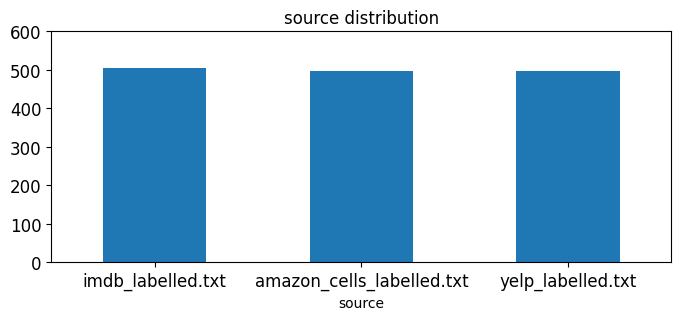

In [39]:
print(df_sample.source.value_counts())

# plot barchart for df_sample
df_sample.source.value_counts().plot(kind = 'bar',
                                           title = 'source distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

                           original_count  sample_count
source                                                 
imdb_labelled.txt                     997           506
yelp_labelled.txt                     996           497
amazon_cells_labelled.txt             990           497


<Axes: title={'center': 'source distribution'}, xlabel='source'>

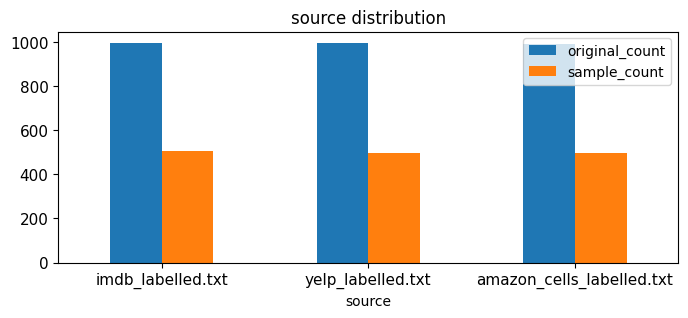

In [40]:
#比較取樣前後分布
df_sample = df.sample(n=1500,random_state=42) 
dfc = pd.concat([df.source.value_counts(),df_sample.source.value_counts()],axis=1)
dfc.columns=['original_count','sample_count']

print(dfc)

dfc.plot(kind = 'bar',
        title = 'source distribution',
        ylim = [0, max(df.source.value_counts() + 50)],        
        rot = 0, fontsize = 11, figsize = (8,3))

### 看來沒怎麼差別

In [41]:
#特徵創造
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df['unigrams'] = df['txt'].apply(lambda df: dmh.tokenize_text(df))

In [43]:
df[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [44]:
df[0:4]

txt  score  \
0  A very, very, very slow-moving, aimless movie ...      0   
1  Not sure who was more lost - the flat characte...      0   
2  Attempting artiness with black & white and cle...      0   
3         Very little music or anything to speak of.      0   

              source                                           unigrams  
0  imdb_labelled.txt  [A, very, ,, very, ,, very, slow-moving, ,, ai...  
1  imdb_labelled.txt  [Not, sure, who, was, more, lost, -, the, flat...  
2  imdb_labelled.txt  [Attempting, artiness, with, black, &, white, ...  
3  imdb_labelled.txt  [Very, little, music, or, anything, to, speak,...

In [45]:
list(df[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

In [46]:
#特徵選取
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.txt) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts)

(2983, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1
  (1, 3063)	1
  (1, 4420)	1
  (1, 5032)	1
  (1, 4968)	1
  (1, 2931)	1
  (1, 2700)	1
  (1, 4531)	2
  (1, 1778)	1
  (1, 764)	1
  (1, 3144)	1
  (1, 332)	1
  (1, 3005)	1
  (1, 2072)	1
  (1, 3097)	1
  (1, 5037)	1
  :	:
  (2980, 3334)	1
  (2980, 2434)	1
  (2980, 2797)	1
  (2981, 4531)	2
  (2981, 2427)	1
  (2981, 4529)	1
  (2981, 3128)	1
  (2981, 2809)	1
  (2981, 4551)	1
  (2981, 3655)	1
  (2981, 1295)	1
  (2981, 2354)	1
  (2981, 3416)	1
  (2981, 2419)	1
  (2982, 3063)	1
  (2982, 4531)	1
  (2982, 5069)	1
  (2982, 5138)	1
  (2982, 674)	1
  (2982, 3026)	1
  (2982, 3123)	1
  (2982, 666)	1
  (2982, 5092)	1
  (2982, 4788)	1
  (2982, 236)	1


In [47]:
print(count_vect.get_feature_names_out()[:10])

['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']


In [48]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [49]:
df_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
import seaborn as sns
df_counts_pd = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names_out())
df_counts_pd.head()

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  yummy  \
0   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
1   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
2   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
3   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
4   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   

   yun  z500a  zero  zillion  zombie  zombiez  
0    0      0     0        0       0        0  
1    0      0     0        0       0        0  
2    0      0     0        0       0        0  
3    0      0     0        0       0        0  
4    0      0     0        0       0        0  

[5 rows x 5155 columns]

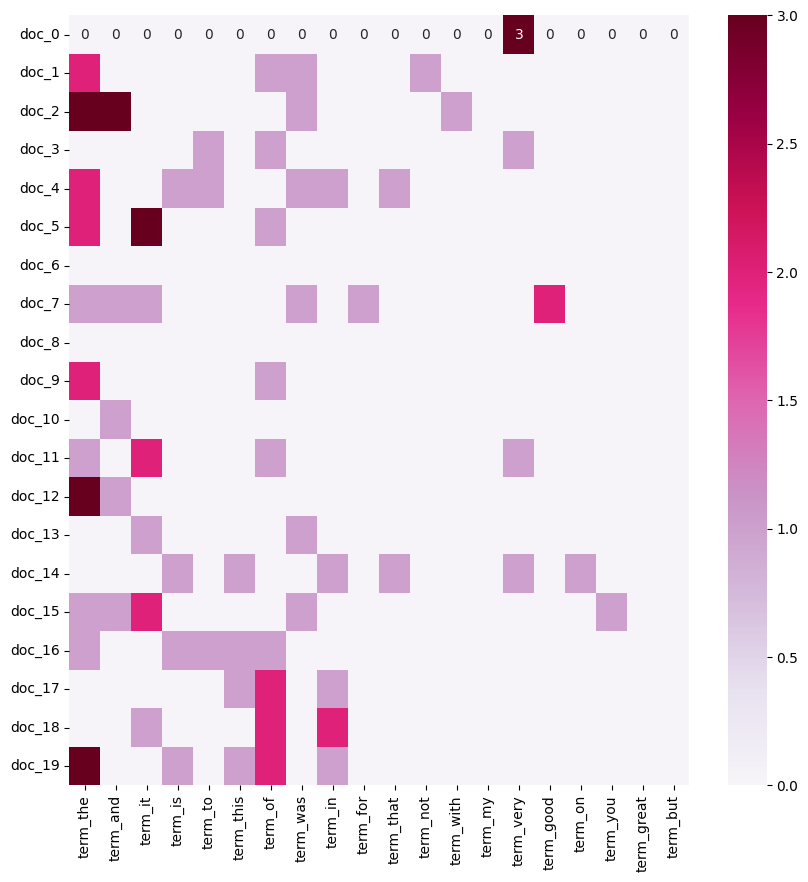

In [51]:
#詞彙分布HEATMAP
colsum = df_counts_pd.sum(axis=0).sort_values(ascending=False).index


df_count_pd = df_counts_pd[colsum[:20]][:20]


df_count_pd.index = ["doc_"+ str(i) for i in list(df_count_pd.index)]

df_count_pd.columns = ["term_"+str(i) for i in list(df_count_pd.columns)]


plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_count_pd,cmap="PuRd",annot=True, fmt = 'd')

### 不知道為甚麼註釋只有第一排有出現

In [52]:
#降維
from sklearn.decomposition import PCA
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2983, 5155)
(2983, 2)


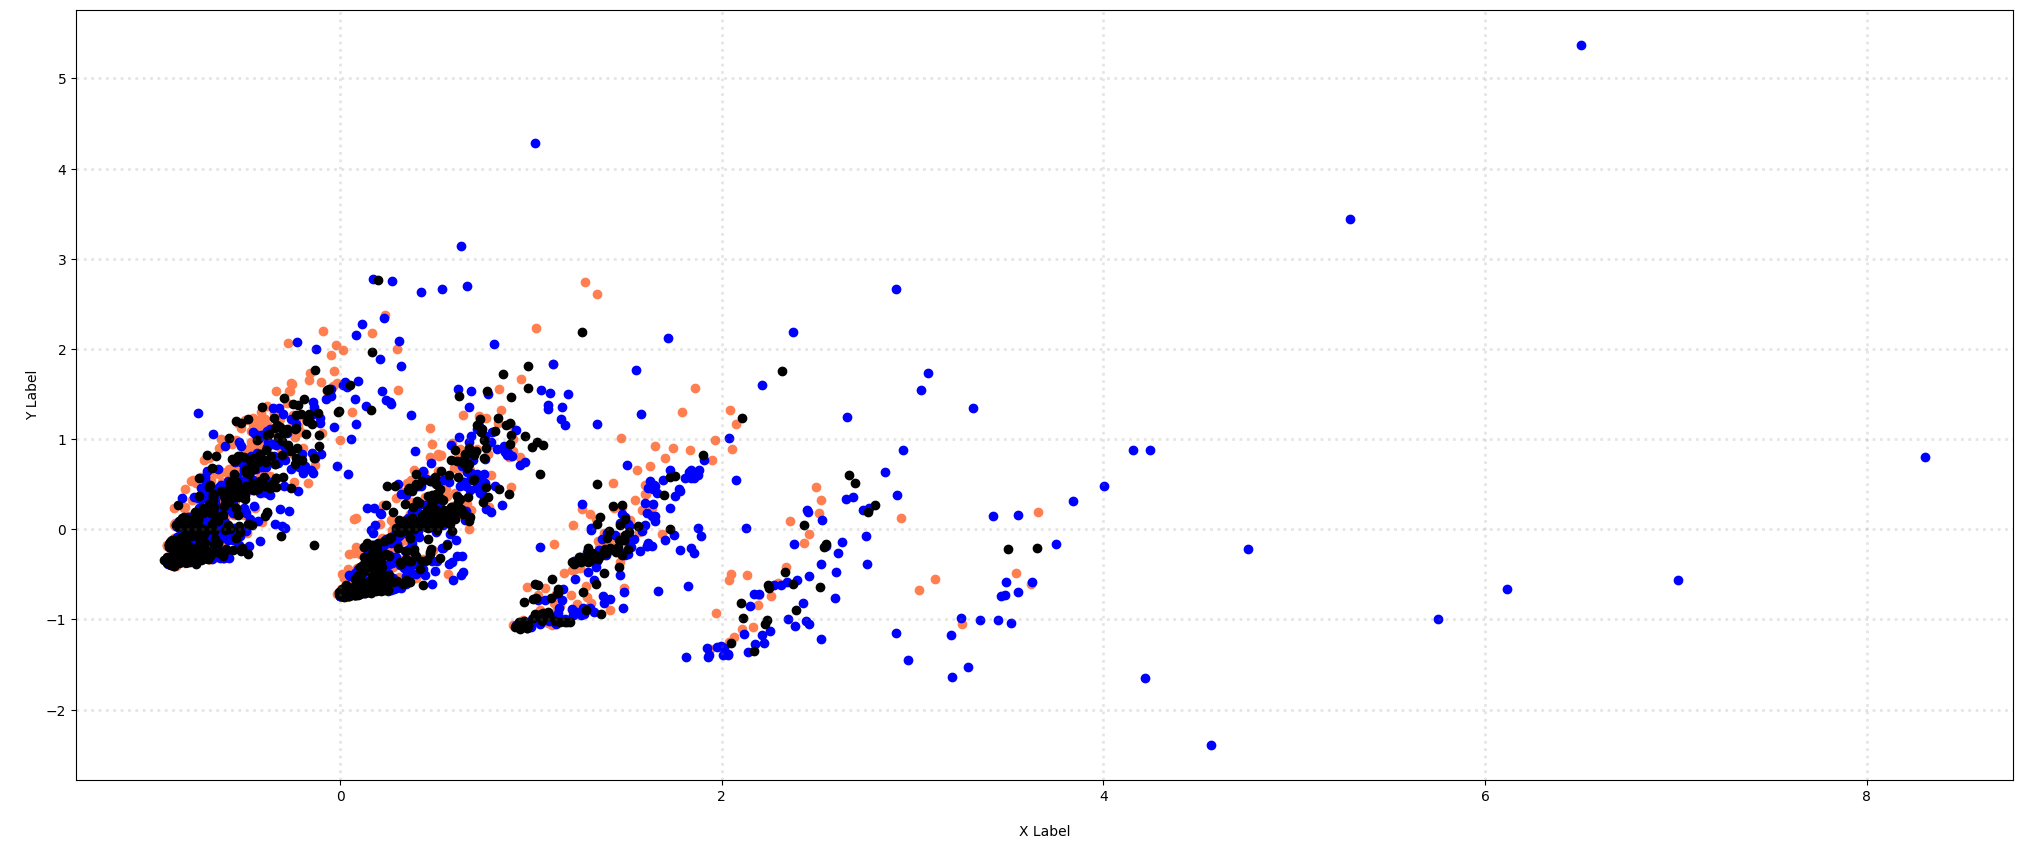

In [53]:
col = ['coral', 'blue', 'black', 'orange']
categories = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

# plot
fig = plt.figure(figsize = (25,10))

ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['source'] == category].T[0]
    ys = df_reduced[df['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20980\1440032584.py:15: MatplotlibDeprecationWarning:

The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.



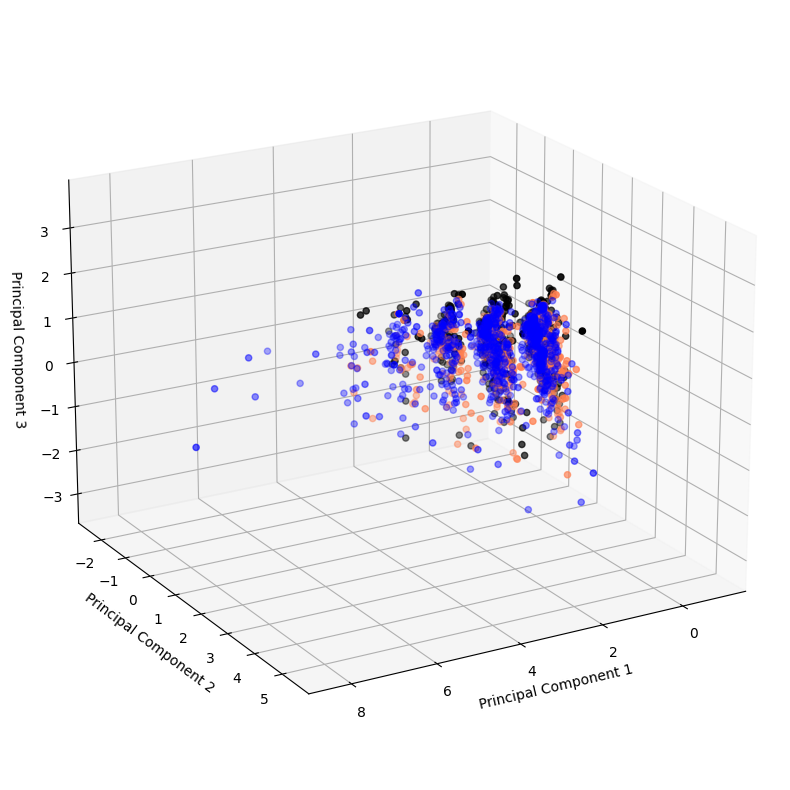

In [54]:
col = ['coral', 'blue', 'black', 'orange']
categories = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
df_reduced
# plot
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['source'] == category].T[0]
    ys = df_reduced[df['source'] == category].T[1]
    zs = df_reduced[df['source']== category].T[2]
    
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=60)
plt.show()


In [55]:
#頻率最高的N個詞
term_frequencies = []
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
print(term_frequencies)

[ 1 36  3 ...  1  2  1]


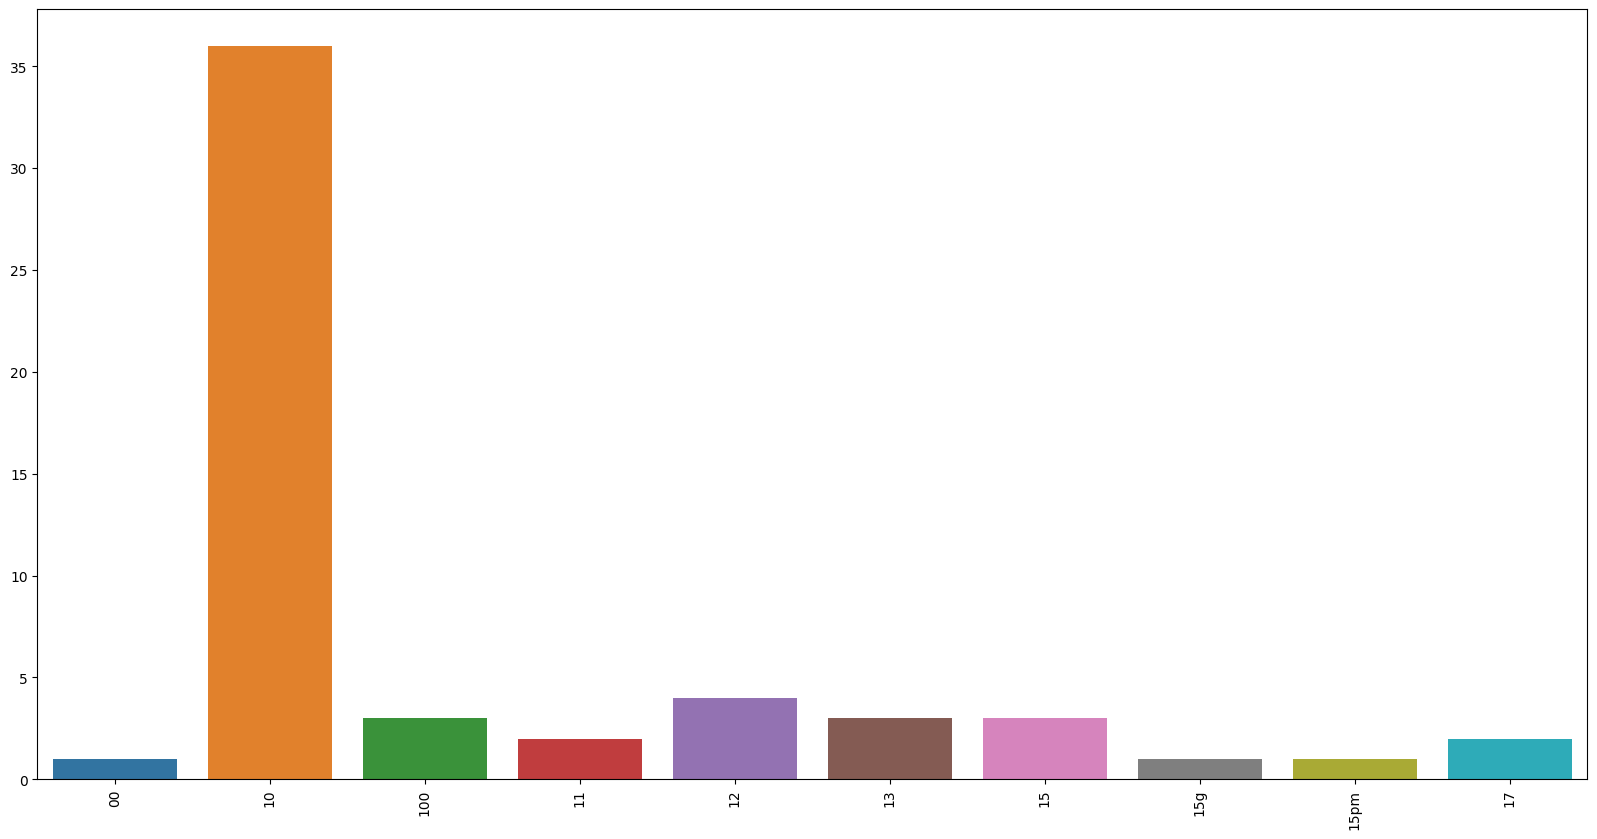

In [56]:
plt.subplots(figsize=(20, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:10], 
            y=term_frequencies[:10])
g.set_xticklabels(count_vect.get_feature_names_out()[:10], rotation = 90);

In [57]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])

fig.show()

In [84]:
#TF-IDF 最高的N個詞
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df.txt)


terms = tfidf_vectorizer.get_feature_names_out()
average_tfidf_scores = tfidf_matrix.mean(axis=0)
average_tfidf_scores = average_tfidf_scores.A1
print(average_tfidf_scores)

top_n = 300
top_indices = average_tfidf_scores.argsort()[-top_n:]
top_indices = top_indices[::-1]

top_terms = [terms[i] for i in top_indices]
top_scores = [average_tfidf_scores[i] for i in top_indices]

fig = go.Figure(data=[go.Bar(x=top_terms, y=top_scores)])
fig.show()

[0.00011345 0.00415229 0.00040399 ... 0.00018074 0.00018386 0.0001069 ]


In [59]:
#one-hot encode
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.source)
df['bin_category'] = mlb.transform(df['source']).tolist()
df[0:9]

txt  score  \
0  A very, very, very slow-moving, aimless movie ...      0   
1  Not sure who was more lost - the flat characte...      0   
2  Attempting artiness with black & white and cle...      0   
3         Very little music or anything to speak of.      0   
4  The best scene in the movie was when Gerardo i...      1   
5  The rest of the movie lacks art, charm, meanin...      0   
6                                  Wasted two hours.      0   
7  Saw the movie today and thought it was a good ...      1   
8                                 A bit predictable.      0   

              source                                           unigrams  \
0  imdb_labelled.txt  [A, very, ,, very, ,, very, slow-moving, ,, ai...   
1  imdb_labelled.txt  [Not, sure, who, was, more, lost, -, the, flat...   
2  imdb_labelled.txt  [Attempting, artiness, with, black, &, white, ...   
3  imdb_labelled.txt  [Very, little, music, or, anything, to, speak,...   
4  imdb_labelled.txt  [The, best, scene, in, the, movie, was, when, ...   
5  imdb_labelled.txt  [The, rest, of, the, movie, lacks, art, ,, cha...   
6  imdb_labelled.txt                            [Wasted, two, hours, .]   
7  imdb_labelled.txt  [Saw, the, movie, today, and, thought, it, was...   
8  imdb_labelled.txt                           [A, bit, predictable, .]   

  bin_category  
0    [0, 1, 0]  
1    [0, 1, 0]  
2    [0, 1, 0]  
3    [0, 1, 0]  
4    [0, 1, 0]  
5    [0, 1, 0]  
6    [0, 1, 0]  
7    [0, 1, 0]  
8    [0, 1, 0]

In [60]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['txt']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['txt']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['txt']
document_to_transform_3.append(random_record_3)

In [61]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I'm glad the film didn't go for the most obvious choice, as a lesser film certainly would have."]
["I don't think you will be disappointed."]
['I paid too much.']


In [62]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_20980\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_20980\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_20980\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_20980\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

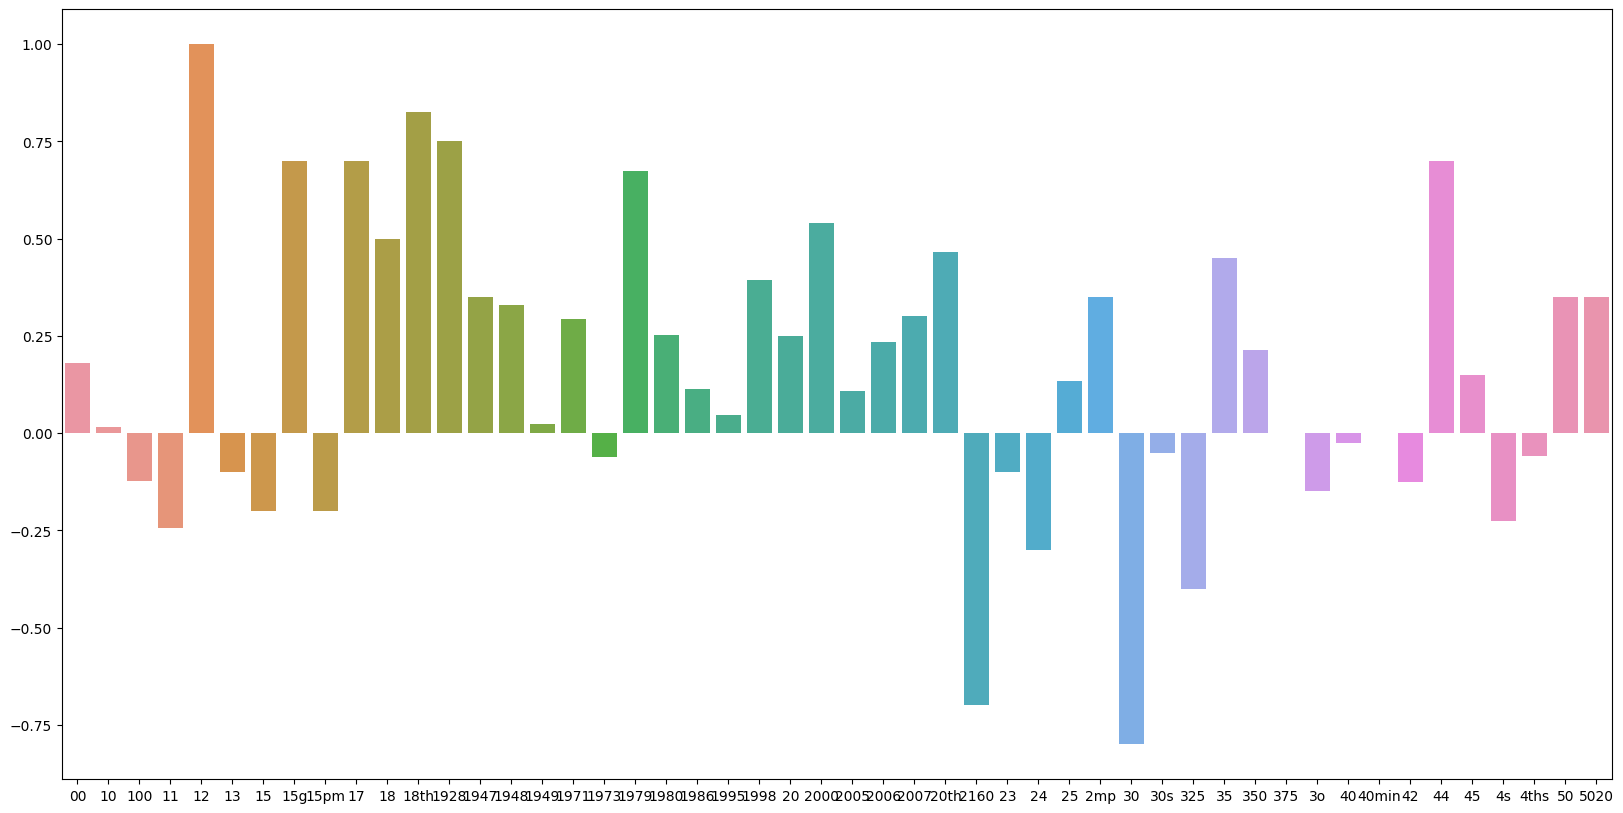

In [81]:
#情感分析
from textblob import TextBlob
#count_vect.get_feature_names_out()

sentiments = []
for text in df.txt.tolist():
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    sentiments.append(sentiment_score)

#print(sentiments)

#sentiments = np.asarray(sentiments)
#indices = sentiments.argsort()[::-1]


#terms = [count_vect.get_feature_names_out()[i] for i in indices]
#scores = [sentiments[i] for i in indices]

plt.subplots(figsize=(20, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], y=sentiments[:50])

### 搞半天好像沒必要排序= =

In [88]:
df_tfidf_pd = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_pd

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2978  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2979  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2980  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2981  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2982  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5155 columns]

In [97]:
#朴素貝葉斯分類器(TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df.txt)
print(type(tfidf_matrix))
print(type(term_frequencies))

# 拆分數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df.score, test_size=0.2, random_state=42)

# 初始化並訓練Naive Bayes分類器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 預測測試集
y_pred = nb_classifier.predict(X_test)

nb_classifier
print('Training score', nb_classifier.score(X_train, y_train))
print('Testing score', nb_classifier.score(X_test, y_test))

# 計算準確度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 分類報告
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
Training score 0.9576697401508801
Testing score 0.8257956448911222
Accuracy: 0.8257956448911222
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       297
           1       0.85      0.80      0.82       300

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



In [98]:
#朴素貝葉斯分類器(詞頻)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# 拆分數據集為訓練集和測試集
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_counts, df.score, test_size=0.2, random_state=42)

# 初始化並訓練Naive Bayes分類器
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(X_train2, y_train2)

# 預測測試集
y_pred2 = nb_classifier2.predict(X_test2)


print('Training score', nb_classifier2.score(X_train2, y_train2))
print('Testing score', nb_classifier2.score(X_test2, y_test2))

# 計算準確度
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

# 分類報告
report2 = classification_report(y_test2, y_pred2)
print("Classification Report:\n", report2)


Training score 0.9497066219614417
Testing score 0.8274706867671692
Accuracy: 0.8274706867671692
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       297
           1       0.85      0.80      0.82       300

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597

